In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df =pd.read_csv("../Dataset/global_cases.csv",index_col='Date',parse_dates=True)

C:\Users\sneha\AppData\Local\Temp\ipykernel_27792\2734720167.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df =pd.read_csv("../Dataset/global_cases.csv",index_col='Date',parse_dates=True)


<Axes: xlabel='Date'>

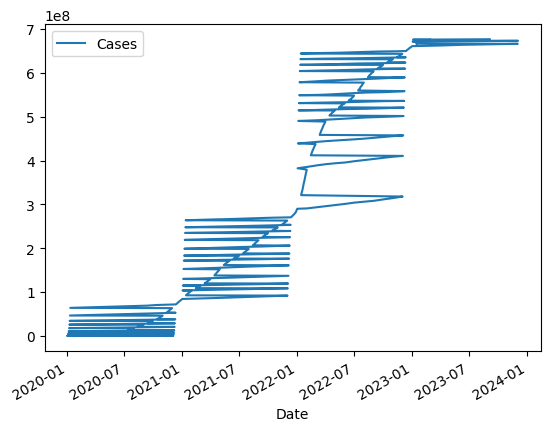

In [8]:
df.plot()

In [11]:
dfr=df.resample('D').ffill()

In [12]:
dfr.head()

,Cases
Date,
2020-01-02,12038
2020-01-03,88402
2020-01-04,955728
2020-01-05,3371033
2020-01-06,6283580


In [13]:
dfr.index.freq='D'

<Axes: xlabel='Date'>

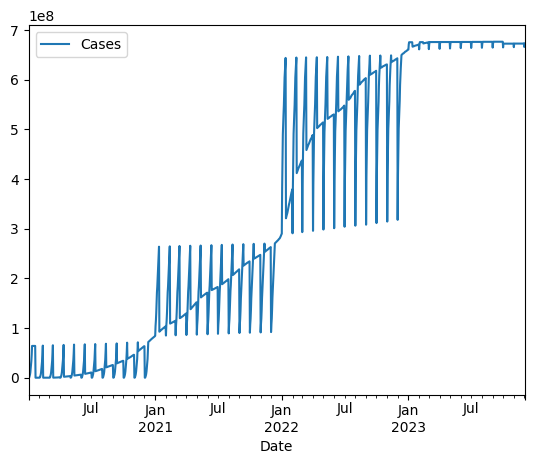

In [14]:
dfr.plot()

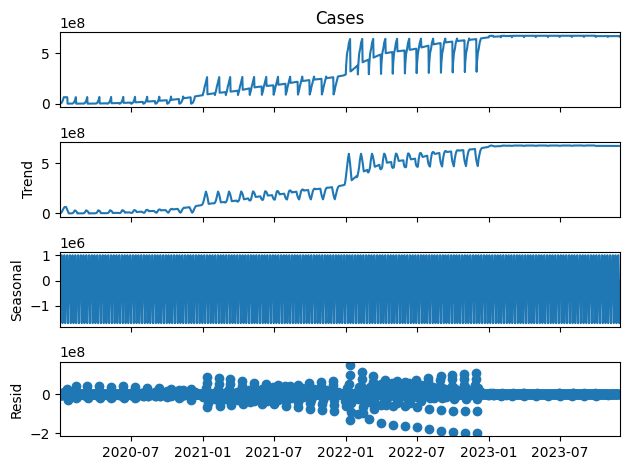

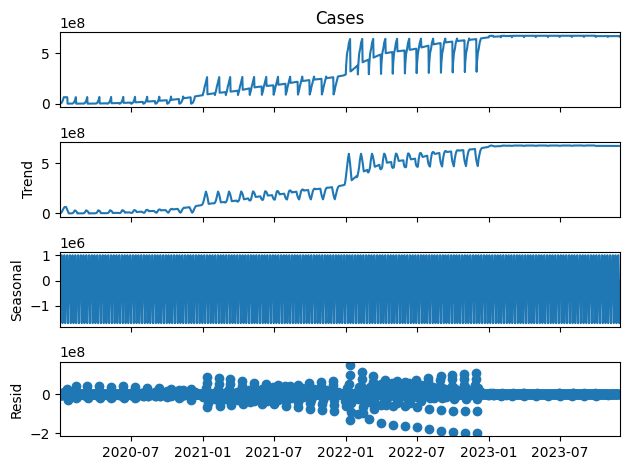

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(dfr['Cases'])
results.plot()
     

In [16]:
len(dfr)

1431

In [17]:
80*1431

114480

In [18]:
0.8*1431

1144.8

In [31]:
train = dfr.iloc[:1144]
test = dfr.iloc[1144:]
     

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [33]:
dfr.head(),dfr.tail()

(              Cases
 Date               
 2020-01-02    12038
 2020-01-03    88402
 2020-01-04   955728
 2020-01-05  3371033
 2020-01-06  6283580,
                 Cases
 Date                 
 2023-11-28  672828531
 2023-11-29  672828531
 2023-11-30  672828531
 2023-12-01  666097539
 2023-12-02  672906177)

In [34]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [35]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [46]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=16)
     

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [48]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [50]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.fit(generator,epochs=50)

Epoch 1/50


71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0440
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0068
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0058
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0062
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0057
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0064
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0068
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0050
Epoch 9/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0046
Epoch 10/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0061
Epoch 11/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0058
Epoch 12/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0041
Epoch 13/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0053
Epoch 14/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0044
Epoch 15/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0042
Epoch 16/50
71/7

In [52]:
last_train_batch = scaled_train[-12:]

In [53]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [54]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


array([[0.992321]], dtype=float32)

In [55]:
scaled_test[0]

array([0.99752019])

In [72]:
def functionforprediction(testp):
    test_predictions = []

    first_eval_batch = scaled_train[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))

    for i in range(len(testp)):
    
    # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
        test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

    return test_predictions

In [84]:
test_predictions=functionforprediction(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

In [85]:
test.head()

,Cases,Predictions
Date,,
2023-02-19,674056229,670542979
2023-02-20,674143589,667997248
2023-02-21,674323721,665700267
2023-02-22,674569824,663627666
2023-02-23,674790916,661821859


In [86]:
test_predictions,scaled_test

([array([0.992321], dtype=float32),
  array([0.98855364], dtype=float32),
  array([0.9851544], dtype=float32),
  array([0.9820872], dtype=float32),
  array([0.9794148], dtype=float32),
  array([0.9771135], dtype=float32),
  array([0.9752047], dtype=float32),
  array([0.97362983], dtype=float32),
  array([0.972241], dtype=float32),
  array([0.9709357], dtype=float32),
  array([0.96964365], dtype=float32),
  array([0.9682791], dtype=float32),
  array([0.9668356], dtype=float32),
  array([0.96535873], dtype=float32),
  array([0.9638804], dtype=float32),
  array([0.9624327], dtype=float32),
  array([0.9610413], dtype=float32),
  array([0.9597265], dtype=float32),
  array([0.95850015], dtype=float32),
  array([0.95735586], dtype=float32),
  array([0.95628273], dtype=float32),
  array([0.9552673], dtype=float32),
  array([0.95429665], dtype=float32),
  array([0.95336056], dtype=float32),
  array([0.95245194], dtype=float32),
  array([0.9515682], dtype=float32),
  array([0.9507094], dtype=flo

In [78]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions.astype(int)


C:\Users\sneha\AppData\Local\Temp\ipykernel_27792\3360722217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions.astype(int)


In [79]:
test.head()

,Cases,Predictions
Date,,
2023-02-19,674056229,670542979
2023-02-20,674143589,667997248
2023-02-21,674323721,665700267
2023-02-22,674569824,663627666
2023-02-23,674790916,661821859


<Axes: xlabel='Date'>

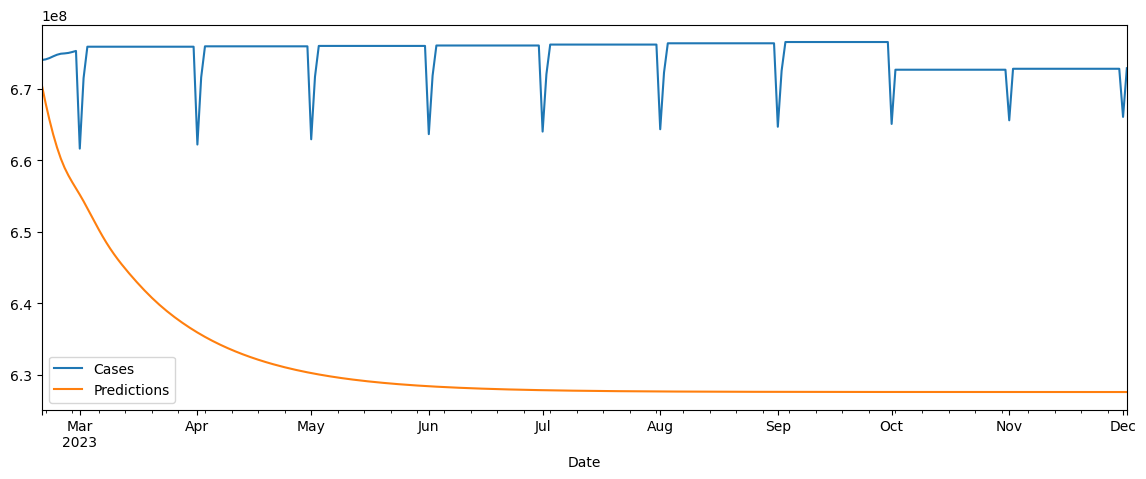

In [80]:
test.plot(figsize=(14,5))

In [83]:
testm=test.resample('M').sum()

C:\Users\sneha\AppData\Local\Temp\ipykernel_27792\1631276972.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  testm=test.resample('M').sum()


<Axes: xlabel='Date'>

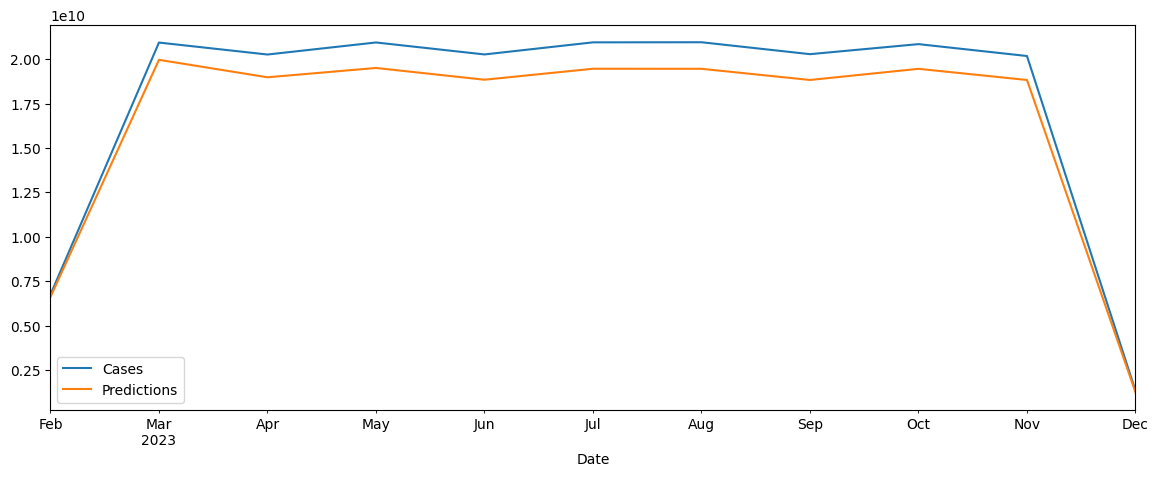

In [82]:
testm.plot(figsize=(14,5))

C:\Users\sneha\AppData\Local\Temp\ipykernel_27792\1240631059.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  testm2=test.resample('M').mean()
